In [ ]:
#!pip install scikit-learn
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# Carregar o dataset
df = pd.read_csv('filmes_filtrados_sem_nulos.csv')

# Converter a coluna 'genres' para uma lista de gêneros
df['genres_names'] = df['genres'].apply(lambda x: x.split('-'))

# Tratando a data
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

# Explodindo a coluna 'genres_names' para que cada gênero fique em uma linha separada
df = df.explode('genres_names').reset_index(drop=True)

# Retirando colunas desnecessárias para a análise
df = df.drop(columns=['id', 'title', 'status', 'release_date', 'genres'])
df.head()

,original_language,popularity,budget,revenue,runtime,vote_average,vote_count,genres_names,release_year,release_month
0,en,8763.998,129000000.0,352056482.0,116.0,7.079,1365.0,Action,2023,8
1,en,8763.998,129000000.0,352056482.0,116.0,7.079,1365.0,Science Fiction,2023,8
2,en,8763.998,129000000.0,352056482.0,116.0,7.079,1365.0,Horror,2023,8
3,en,5953.227,18000000.0,65675816.0,103.0,7.433,545.0,Horror,2023,4
4,en,5953.227,18000000.0,65675816.0,103.0,7.433,545.0,Mystery,2023,4


In [ ]:
resultados = []

for n_clusters in [5, 7, 9]:
    pipeline = make_pipeline(
        StandardScaler(),
        KMeans(n_clusters=n_clusters, random_state=87, n_init=10)
    )
    X_numerico
    pipeline.fit(X_numerico)
    labels = pipeline.named_steps['kmeans'].labels_
    counts = pd.Series(labels).value_counts().sort_index()
    resultados.append(
        pd.DataFrame({
            'n_clusters': n_clusters,
            'cluster': counts.index,
            'qtd_itens': counts.values
        })
    )

df_clusters = pd.concat(resultados, ignore_index=True)
display(df_clusters)


,n_clusters,cluster,qtd_itens
0,5,0,7732
1,5,1,9549
2,5,2,2541
3,5,3,2311
4,5,4,39
5,7,0,2490
6,7,1,3592
7,7,2,1985
8,7,3,5999
9,7,4,46


C:\Users\hihi\AppData\Local\Temp\ipykernel_1132\2175357807.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cluster', y='qtd_itens', data=df_7_clusters, palette='viridis')


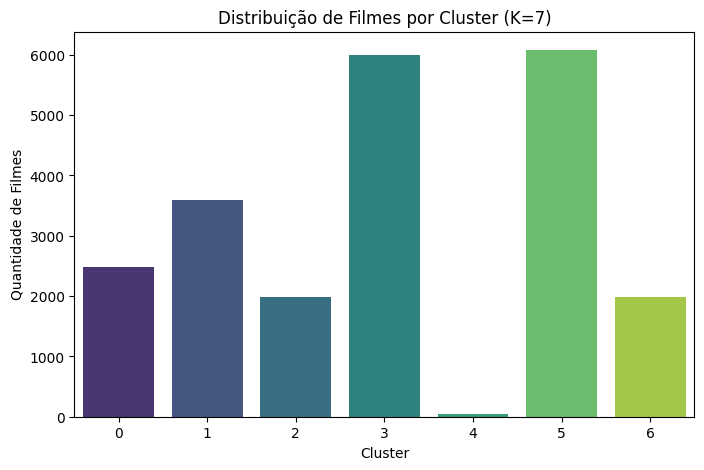

,popularity,budget,runtime,vote_average,vote_count,release_year,release_month
cluster_7,,,,,,,
0,28.581500,2.587969e+07,149.520482,7.013366,1339.524096,2003.446586,8.177510
1,15.388294,2.120967e+07,97.273385,5.209016,490.985245,2001.899220,7.772829
2,14.759393,3.789866e+06,107.831738,6.905596,836.254912,1959.896222,7.151134
3,26.096502,2.396612e+07,104.773629,6.384003,1188.071512,2005.625438,3.091682
4,3995.380391,1.276957e+08,121.500000,7.237957,1436.065217,2023.391304,6.000000
5,26.290476,2.416320e+07,104.258924,6.672521,1463.204474,2005.874486,9.585952
6,94.065636,1.293755e+08,121.313478,7.016309,9696.649672,2010.990409,7.063099


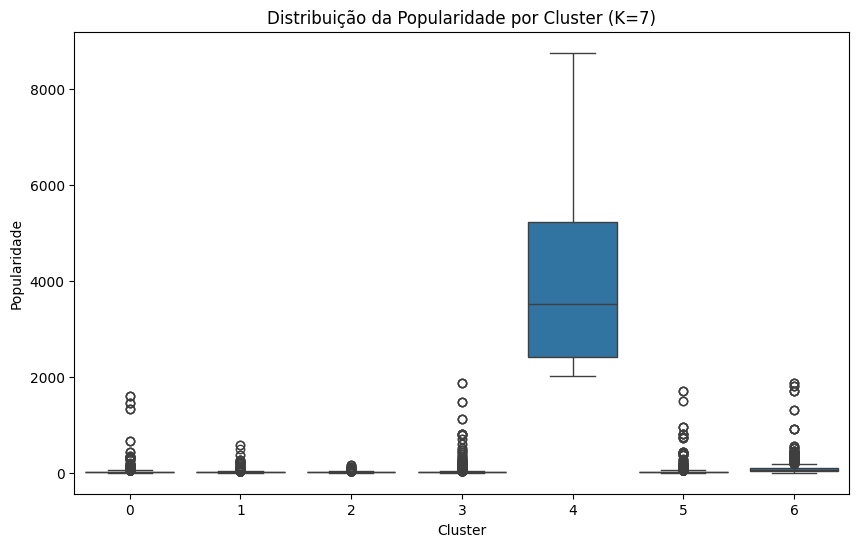

Cluster 0: 2490 filmes
Cluster 1: 3592 filmes
Cluster 2: 1985 filmes
Cluster 3: 5999 filmes
Cluster 4: 46 filmes
Cluster 5: 6079 filmes
Cluster 6: 1981 filmes

Clusters com poucos filmes geralmente agrupam obras com características muito distintas ou extremas, como orçamentos muito altos/baixos, popularidade fora do padrão ou anos de lançamento atípicos. Já clusters numerosos reúnem filmes com características mais comuns no dataset, formando grupos mais homogêneos e numerosos.



In [ ]:
# Obter os resultados para 7 clusters
df_7_clusters = df_clusters[df_clusters['n_clusters'] == 7].sort_values('cluster')

# Visualizar a distribuição de filmes por cluster
plt.figure(figsize=(8, 5))
sns.barplot(x='cluster', y='qtd_itens', data=df_7_clusters, palette='viridis')
plt.title('Distribuição de Filmes por Cluster (K=7)')
plt.xlabel('Cluster')
plt.ylabel('Quantidade de Filmes')
plt.show()

# Adicionar os rótulos dos clusters ao dataframe original
pipeline_7 = make_pipeline(StandardScaler(), KMeans(n_clusters=7, random_state=87, n_init=10))
pipeline_7.fit(X_numerico)
labels_7 = pipeline_7.named_steps['kmeans'].labels_
df['cluster_7'] = labels_7

# Analisar as médias das variáveis numéricas por cluster
cluster_means = df.groupby('cluster_7')[features_numericas].mean()
display(cluster_means)

# Visualizar a distribuição de um atributo relevante por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster_7', y='popularity', data=df)
plt.title('Distribuição da Popularidade por Cluster (K=7)')
plt.xlabel('Cluster')
plt.ylabel('Popularidade')
plt.show()

# Análise textual
for idx, row in df_7_clusters.iterrows():
    print(f"Cluster {row['cluster']}: {row['qtd_itens']} filmes")

print("""
Clusters com poucos filmes geralmente agrupam obras com características muito distintas ou extremas, como orçamentos muito altos/baixos, popularidade fora do padrão ou anos de lançamento atípicos. Já clusters numerosos reúnem filmes com características mais comuns no dataset, formando grupos mais homogêneos e numerosos.
""")

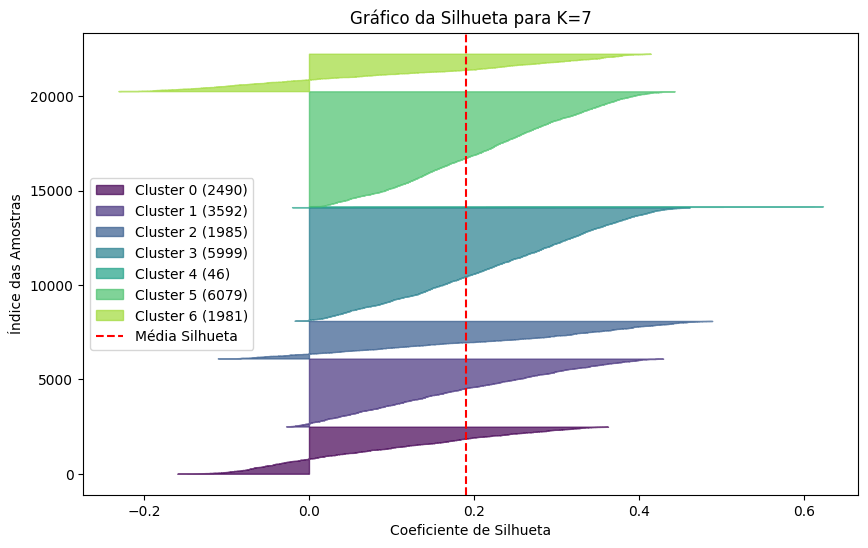

In [ ]:
# Calcular a silhueta para os clusters com K=7
silhouette_vals = silhouette_samples(StandardScaler().fit_transform(X_numerico), labels_7)
silhouette_avg = silhouette_score(StandardScaler().fit_transform(X_numerico), labels_7)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(7):
    ith_cluster_silhouette_values = silhouette_vals[labels_7 == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.viridis(float(i) / 7)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7,
                      label=f'Cluster {i} ({size_cluster_i})')
    y_lower = y_upper + 10  # espaço entre clusters

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label='Média Silhueta')
plt.xlabel("Coeficiente de Silhueta")
plt.ylabel("Índice das Amostras")
plt.title("Gráfico da Silhueta para K=7")
plt.legend(loc='best')
plt.show()